In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
train_data = pd.read_csv('train.csv')
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
eight_img = cv2.imread('two.png',cv2.IMREAD_GRAYSCALE)

In [4]:
_, thres_hold = cv2.threshold(eight_img, 127,255, cv2.THRESH_BINARY)
inverted = cv2.bitwise_not(thres_hold)

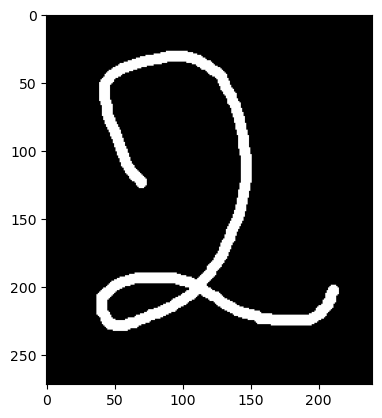

In [5]:
plt.imshow(inverted, cmap='gray')

In [6]:
predicting_digit = cv2.resize(inverted, (28,28))
predicting_digit.shape

(28, 28)

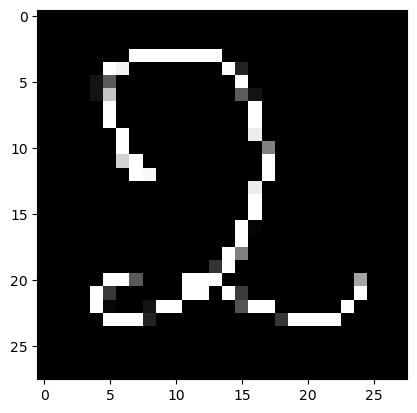

In [7]:
plt.imshow(predicting_digit, cmap='gray')

In [8]:
standardScaler = StandardScaler()
flattern_predicting_image = predicting_digit.flatten()
# inputimage = standardScaler.transform(flattern_predicting_image)

In [9]:
X = train_data.drop('label', axis = 1)
y = train_data['label']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=41)

In [11]:
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

In [12]:
svm_model = SVC(kernel='rbf', C = 2.0, gamma= 'scale')
svm_model.fit(X_train,y_train)

SVC(C=2.0)

In [20]:
inputimage = standardScaler.transform(flattern_predicting_image.reshape(1,-1))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  caller_name=self.__class__.__name__,


In [21]:
predict = svm_model.predict(inputimage)

In [23]:
predict[0]

2

In [24]:
param_grid = {
    'C': [1],
    'kernel':['rbf'],
    'gamma':['auto']
}
grid_search = GridSearchCV(SVC(), param_grid, cv = 2, scoring='accuracy', verbose=0)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.9486607142857143
